In [97]:
%matplotlib inline
from astropy.io import fits
import numpy as np
import copy
import matplotlib.pyplot as plt
#import constants as pc

'''
INSTRUCTIONS:

- to see the list for evolve both stars
    ls /opt/mesa/mesa-r23.05.1/binary/test_suite
- to make the file
    cp -r /opt/mesa/mesa-r23.05.1/binary/test_suite/evolve_both_stars ~/.
    cd evolve_both_stars
- then to look at the file in order to change initial values
    type 'nano inlist_project' to get into file
    
    &binary_job

       inlist_names(1) = 'inlist1' 
       inlist_names(2) = 'inlist2'

       evolve_both_stars = .true.

    !   pgbinary_flag = .true.

    / ! end of binary_job namelist

    &binary_controls
       # ONLY CHANGE THE MASS FOR m1

       m1 = 1.0d0  ! donor mass in Msun                           change only this mass
       m2 = 0.8d0 ! companion mass in Msun
       initial_period_in_days = 0.5d0

       fr = 0.01
       fr_limit = 1d-3

       limit_retention_by_mdot_edd = .false.

    / ! end of binary_controls namelist

- and then run the code 
    ./mk
    ./rn

- after the code is finished running for hopefully all 28 profile datas, take all the profiledata nd copy it over to a new file in the 
  evolve_both_stars called something like Mass_1M then run again using mass like m1=1.1d0 and repeat. After this then start the analysis
- also need to download the py_mesa_reader in the HOME. look at the last part of Lab 5 to do this




IDEAS FOR CODING:

evolve_both_stars
    Tests MESA evolving two stars simultaneously including mass transfer.
1.3M_ms_
1.4M_ms_
1.5M_ms_

# may be useful for a model maybe
accreted_material_j
    This test suite example checks the accretion of material and angular momentum onto a 20 
    model.
    
# changing the inlist may make this useful
conserve_angular_momentum
    This test suite example checks angular momentum conservation from the zero age main-sequence to the formation of a helium core in 1.0 
    Z=0.02 metallicity, model.
    
# not too sure what this is but may be cool
custom_colors
    This test suite example shows how to use user-defined color filter and extinction files.

# testing
cd star/test_suite/high_mass
./mk
./rn




RANDOM:

look at star tests in MESA website
use hydrocode for supernova or core collapse, MESA uses hydro equil so no core collapse
look at binary tests in MESA website
ls shows menu 
ls /opt/mesa/mesa-r23.05.1/star/test_suite
could also do binary
maybe use mdot
cd 7M_prems......./
./mk make
./rn run
star core temp around 10^7
can look at chemical compositions in center of star
cat inlist gives what some inlists do like (cat shows all text of a file)
cat inlist_7M_..... this is useful for initial mass changes with nano ~/.bashrc
mass and radius in solar units and everything else in cgs units
    how mass accretion affects the heat transfer on heat transfer zones in a star
Sun metalicity near Z = 0.02
Z affects blue or red suprgiants
change profile_interval for when you get profile data files (in terms of steps)
grep 'initial_ass' inlis* used to find where this is mentioned
profilXX.data at a certain point in time, full star info
history.data time series information about the entire calculation (useful for plotting something against time)
ms.bulk_names useful to see all variable names can google mesa and variable name for documentation
could also plot triple alpha energy generation rate (along with pp cno)
git clone 



MAY BE USEFUL:

NEED MODEL NEAR END TO TEST RESULTS, MOST LIKELY HYDROSTATIC EQUILIBRIUM OR VIRIAL THEOREM (ended up using mass transfer for test)
evolve_both_stars
    Tests MESA evolving two stars simultaneously including mass transfer.
star_plus_point_mass
    Tests MESA evolving one star plus a point mass, including mass transfer to the point mass.
star_plus_point_mass_explicit_mdot
    Same as above, but run using an explicit calculation for the mass transfer rate

INFORMATION:

*****************
evolve_both_stars
*****************

This test case checks the evolution of two stars simultaneously including mass transfer.

This test case has 1 part. Click to see a larger version of a plot.

* Part 1 (``inlist_project``) loads a 1 Msun and a 0.8 Msun zero-age main sequence models. The binary system has an initial period of
0.5 day, and is evolved until the Roche Lobe overflow indicator (R - Rlobe)/Rlobe  is greater than the default 0.0 value of 
``accretor_overflow_terminate``:

mixing regions
      
      mass_conv_core ! (Msun) mass coord of top of convective core.  0 if core is not convective
      
      
      !  mx1 refers to the largest (by mass) convective region.
      !  mx2 is the 2nd largest.

      !  conv_mx1_top and conv_mx1_bot are the region where mixing_type == convective_mixing.
      !  mx1_top and mx1_bot are the extent of all kinds of mixing, convective and other.
      
      ! values are m/Mstar
      conv_mx1_top
      conv_mx1_bot
      conv_mx2_top
      conv_mx2_bot
      mx1_top
      mx1_bot
      mx2_top
      mx2_bot
      
      ! radius -- values are radii in Rsun units
      !conv_mx1_top_r
      !conv_mx1_bot_r
      !conv_mx2_top_r
      !conv_mx2_bot_r
      !mx1_top_r
      !mx1_bot_r
      !mx2_top_r
      !mx2_bot_r
'''

"\nINSTRUCTIONS:\n\n- to see the list for evolve both stars\n    ls /opt/mesa/mesa-r23.05.1/binary/test_suite\n- to make the file\n    cp -r /opt/mesa/mesa-r23.05.1/binary/test_suite/evolve_both_stars ~/.\n    cd evolve_both_stars\n- then to look at the file in order to change initial values\n    type 'nano inlist_project' to get into file\n    \n    &binary_job\n\n       inlist_names(1) = 'inlist1' \n       inlist_names(2) = 'inlist2'\n\n       evolve_both_stars = .true.\n\n    !   pgbinary_flag = .true.\n\n    / ! end of binary_job namelist\n\n    &binary_controls\n       # ONLY CHANGE THE MASS FOR m1\n\n       m1 = 1.0d0  ! donor mass in Msun                           change only this mass\n       m2 = 0.8d0 ! companion mass in Msun\n       initial_period_in_days = 0.5d0\n\n       fr = 0.01\n       fr_limit = 1d-3\n\n       limit_retention_by_mdot_edd = .false.\n\n    / ! end of binary_controls namelist\n\n- and then run the code \n    ./mk\n    ./rn\n\n- after the code is finished 

In [98]:
# some of the first bits of below code is just for practice and reference for later coding on the actual project
import sys
sys.path.append('/home/stdi6279/py_mesa_reader')
import mesa_reader as m

# create path, ms and rg so that I can pull data from the profile.data to plot graphs later on
path = '/home/stdi6279/7M_prems_to_AGB/'
ms = m.MesaData(file_name=path+'LOGS/profile4.data')
rg = m.MesaData(file_name=path+'LOGS/profile6.data')

Text(0, 0.5, 'Density (g $cm^{-3}$)')

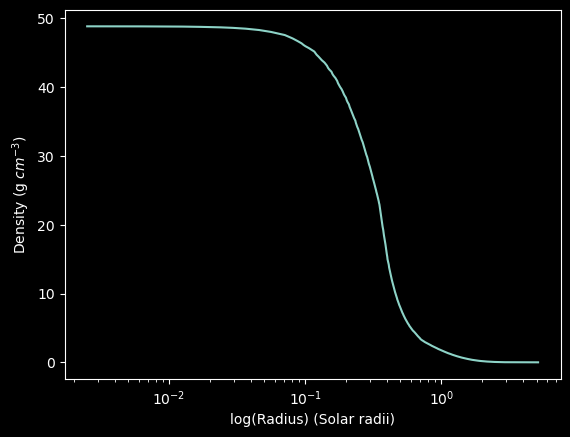

In [99]:
#.....................................................................TEST.....................................................................

# create the plot of density against radius using profile 4 data
plt.semilogx(ms.data('radius'), 10**(ms.data('logRho')))

# assign accurate labels to the axes
plt.xlabel('log(Radius) (Solar radii)'); plt.ylabel('Density (g $cm^{-3}$)')

4986.06945353158
6794.561480870929
21404.27517212973
4443.249367481949


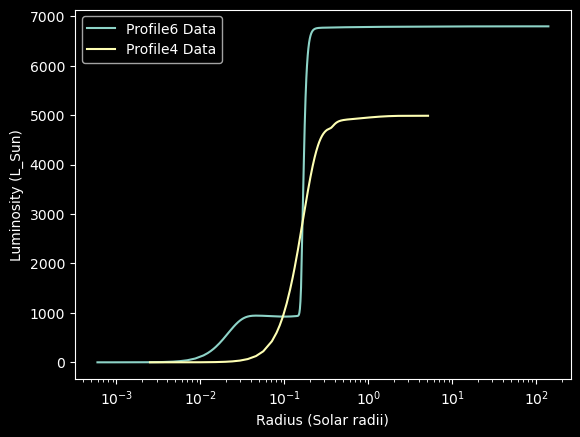

In [100]:
#.....................................................................TEST.....................................................................

# create the plot of luminosity against radius for profile 4 and 6 data
plt.semilogx(rg.data('radius'), (rg.data('luminosity')), label = "Profile6 Data")
plt.semilogx(ms.data('radius'), (ms.data('luminosity')), label = "Profile4 Data")

# assign accurate labels to the axes
plt.xlabel('Radius (Solar radii)'); plt.ylabel('Luminosity (L_Sun)')

# show legend
plt.legend()

print(max(ms.data('luminosity')))
print(max(rg.data('luminosity')))

print(ms.Teff)
print(rg.Teff)

In [101]:
#.....................................................................TEST..EXAMPLES...............................................................

# import a code file hydro3.py
import SDhydro3_mesa as hydro3
from astropy.io import ascii

# define a dictionary of arguments that we will pass to the hydrodynamics code specifying the problem to run
args = {'mname':'lab1/profile3.data','htype':'zero','piston_eexp':5e50,'v_piston':1e9,'piston_stop':10,'r_outer':1e13,'rmin':1e8,'t_stop':1e7,'noplot':1}

# define the variable h which is a "lagrange_hydro_1d" object (instance of a class)
h = hydro3.lagrange_hydro_1d(**args)

print(h.mname)




# variables stored within our object h are accessed by h.variable_name
# use your past labs and class notebooks, the hydro code notes, and class slides for help!

# by looking at past labs I realized I just need to re-initialize the hydro3_mesa file with the new i and b types 
h.bctype=[h.FALLBACK, h.OUTFLOW]
h.itype=h.MESA

h.setup_initial_conditions()
h.initialize_boundary_conditions()
h.apply_boundary_conditions()




t_stop = [1e2,3e2,1e3,3e3,1e4,3e4,1e5,3e5,1e6]
# Using this so that the values are not printed out as this makes the HTML file more difficult to navigate
h.print = False

# using the run_checkpoint function in the hydro3_mesa file
new_values = h.run_checkpoint(t_stop)

# create empty lists of correct size so that I can then replace the zeroes in each array with the correct value
min_rad = [0] * len(new_values)
max_rad = [0] * len(new_values)

# same thing as before
m_tot = [0] * len(new_values)
m_inner = [0] * len(new_values)

# for loop using enumeration to plot the graphs
for i, H in enumerate(new_values):
    # create the loglog plot of density against radius for each time in t_stop
    plt.loglog(H.zones.r, H.zones.d, label = f"{t_stop[i]} s")
    
    # replacing the values in the arrays above with the correct values
    min_rad[i] = H.zones.r[0]
    max_rad[i] = H.zones.r[-1]
    
    m_tot[i] = H.zones.mcum[-1]
    m_inner[i] = H.mass_r_inner

# assign accurate labels to the axes
plt.xlabel('log Radius (cm)'); plt.ylabel('log Density (g $cm^{-3}$)')

#create a legend and re-locate it to the right of the graph
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')




# create the loglog plot of pressure against radius for each time in t_stop
for i, H in enumerate(new_values):
    plt.loglog(H.zones.r, H.zones.p, label = f"{t_stop[i]} s")
    
# assign accurate labels to the axes
plt.xlabel('log Radius (cm)'); plt.ylabel('log Pressure (g $cm^{-1}$ $s^{-2}$)')

#create a legend and re-locate it to the right of the graph
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ModuleNotFoundError: No module named 'SDhydro3_mesa'

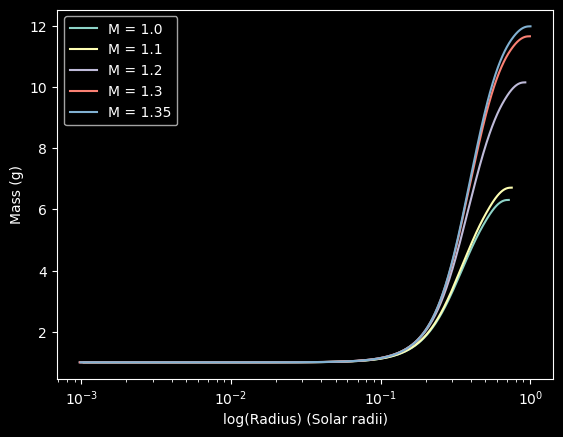

In [102]:
'''
START OF THE PROJECT

using nao inlist_project

&binary_job

   inlist_names(1) = 'inlist1'
   inlist_names(2) = 'inlist2'

   evolve_both_stars = .true.

!   pgbinary_flag = .true.

/ ! end of binary_job namelist

&binary_controls

   m1 = 1.0d0  ! donor mass in Msun               changing this mass from 1.0M to 1.35M as 1.4M causes simulation to break
   m2 = 0.8d0 ! companion mass in Msun
   initial_period_in_days = 0.5d0

   fr = 0.01
   fr_limit = 1d-3

   limit_retention_by_mdot_edd = .false.

/ ! end of binary_controls namelist

'''

import sys
sys.path.append('/home/stdi6279/py_mesa_reader')
import mesa_reader as m

# create path so that I can pull data from the profile.data to plot graphs later on
path = '/home/stdi6279/evolve_both_stars/'
#a1 = m.MesaData(file_name=path+'LOGS1/profile15.data')
a1 = m.MesaData(file_name=path+'2Mass_1M/profile15.data')
a2 = m.MesaData(file_name=path+'2Mass_1.1M/profile15.data')
a3 = m.MesaData(file_name=path+'2Mass_1.2M/profile15.data')
a4 = m.MesaData(file_name=path+'2Mass_1.3M/profile15.data')
a5 = m.MesaData(file_name=path+'2Mass_1.35M/profile15.data')
#a6 = m.MesaData(file_name=path+'1Mass_1.15M/profile1.data')
his = m.MesaData(file_name=path+'binary_history.data')

#................................................................................MASS......................................................................................
# create the plot of mass against radius using 
plt.semilogx(a1.data('radius'), 10**(a1.data('mass')), label = 'M = 1.0')
plt.semilogx(a2.data('radius'), 10**(a2.data('mass')), label = 'M = 1.1')
plt.semilogx(a3.data('radius'), 10**(a3.data('mass')), label = 'M = 1.2')
plt.semilogx(a4.data('radius'), 10**(a4.data('mass')), label = 'M = 1.3')
plt.semilogx(a5.data('radius'), 10**(a5.data('mass')), label = 'M = 1.35')
#plt.semilogx(a6.data('radius'), 10**(a5.data('mass')), label = 'M = 1.15')

# for 1.4M there seems to be a missing data entry causing the array to be of the wrong size
# plt.semilogx(a5.data('radius'), 10**(a4.data('mass')), label = 'M = 1.4')

# limit encase needed for finer inspection
# plt.xlim(0.6, 1)

#......................................................................BELOW GRAPH MAY BE THE TEST.......................................................................
# Can also use keplers equation to find the distance between the two stars

# assign accurate labels to the axes
plt.xlabel('log(Radius) (Solar radii)'); plt.ylabel('Mass (g)')
plt.legend()

# save the plot to a file (adjust file path and format as needed)
plt.savefig('Mass_accretion.png', dpi=300, bbox_inches='tight')

#print(a1.Teff)
#print(a2.Teff)
#print(a3.Teff)
#print(a4.Teff)

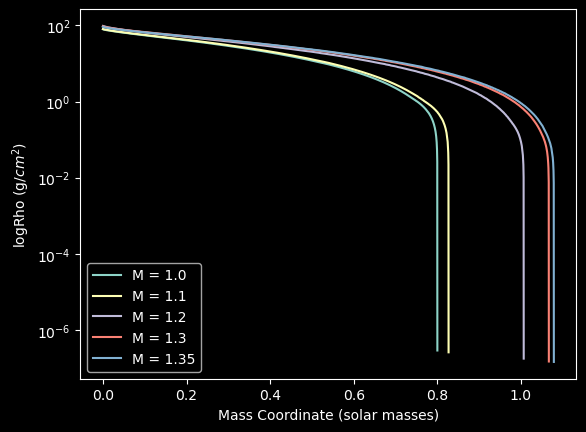

In [103]:
#..........................................................................DENSITY.........................................................................................
# create the plot of density against mass coordinates using profile 15 data
plt.semilogy(a1.data('mass'), 10**(a1.data('logRho')), label = 'M = 1.0')
plt.semilogy(a2.data('mass'), 10**(a2.data('logRho')), label = 'M = 1.1')
plt.semilogy(a3.data('mass'), 10**(a3.data('logRho')), label = 'M = 1.2')
plt.semilogy(a4.data('mass'), 10**(a4.data('logRho')), label = 'M = 1.3')
plt.semilogy(a5.data('mass'), 10**(a5.data('logRho')), label = 'M = 1.35')
# plt.semilogx(a3.data('radius'), 10**(a3.data('tau')), label = 'Laterlater')


# assign accurate labels to the axes
plt.xlabel('Mass Coordinate (solar masses)'); plt.ylabel('logRho (g/$cm^2$)')
plt.legend()

Maximum value: 1.0066082560670127


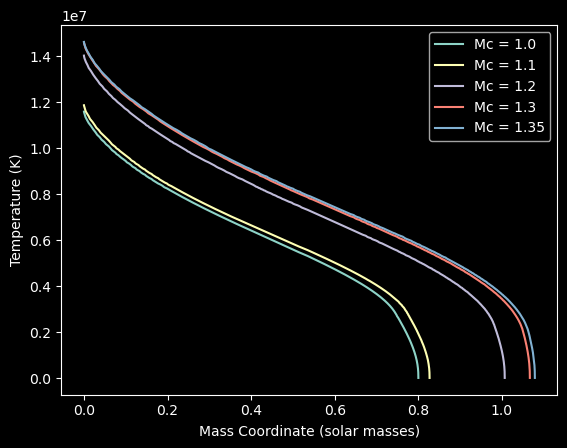

In [104]:
#..........................................................................TEMPERATURE.....................................................................................
# create the plot of temperature against mass coordinates using profile 15 data
plt.plot(a1.data('mass'), (a1.data('temperature')), label = 'Mc = 1.0')
plt.plot(a2.data('mass'), (a2.data('temperature')), label = 'Mc = 1.1')
plt.plot(a3.data('mass'), (a3.data('temperature')), label = 'Mc = 1.2')
plt.plot(a4.data('mass'), (a4.data('temperature')), label = 'Mc = 1.3')
plt.plot(a5.data('mass'), (a5.data('temperature')), label = 'Mc = 1.35')
# plt.semilogx(a3.data('radius'), 10**(a3.data('tau')), label = 'Laterlater')

#plt.xlim(0, 0.3)

# assign accurate labels to the axes
plt.xlabel('Mass Coordinate (solar masses)'); plt.ylabel('Temperature (K)')
plt.legend()

# max temperature
max_value = max(a3.data("mass"))
print("Maximum value:", max_value)

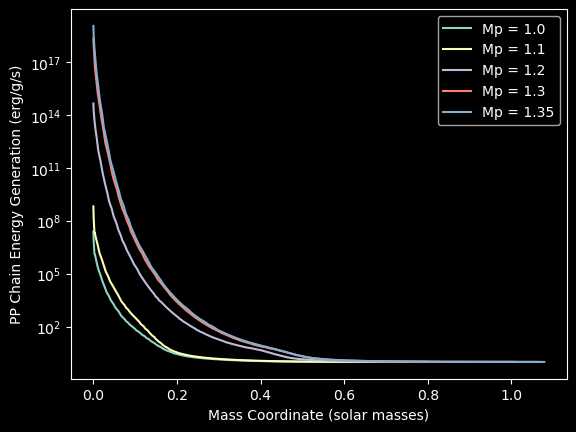

In [105]:
#..........................................................................PP.CHAIN.......................................................................................
# create the plot of pp chain energy generation against mass coordinates using profile 15 data
plt.semilogy(a1.data('mass'), 10**(a1.data('pp')), label = 'Mp = 1.0')
plt.semilogy(a2.data('mass'), 10**(a2.data('pp')), label = 'Mp = 1.1')
plt.semilogy(a3.data('mass'), 10**(a3.data('pp')), label = 'Mp = 1.2')
plt.semilogy(a4.data('mass'), 10**(a4.data('pp')), label = 'Mp = 1.3')
plt.semilogy(a5.data('mass'), 10**(a5.data('pp')), label = 'Mp = 1.35')
# plt.semilogx(a3.data('radius'), 10**(a3.data('tau')), label = 'Laterlater')

#plt.xlim(0, 0.3)

# assign accurate labels to the axes
plt.xlabel('Mass Coordinate (solar masses)'); plt.ylabel('PP Chain Energy Generation (erg/g/s)')
plt.legend()

Maximum value: 0.8268239385453623


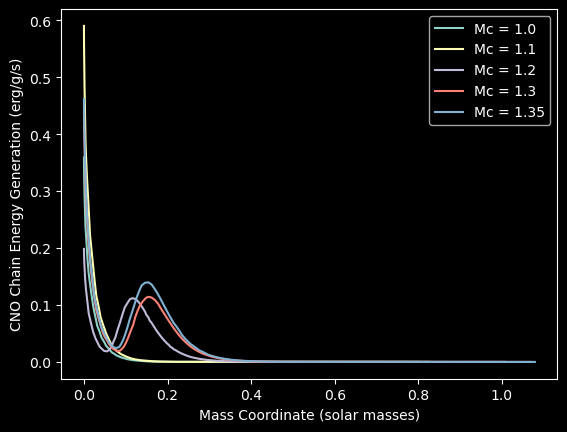

In [106]:
#..........................................................................CNO.CYCLE......................................................................................
# units of ergs/g/sec

# create the plot of cno chain energy generation against mass coordinates using profile 15 data
plt.plot(a1.data('mass'), (a1.data('cno')), label = 'Mc = 1.0')
plt.plot(a2.data('mass'), (a2.data('cno')), label = 'Mc = 1.1')
plt.plot(a3.data('mass'), (a3.data('cno')), label = 'Mc = 1.2')
plt.plot(a4.data('mass'), (a4.data('cno')), label = 'Mc = 1.3')
plt.plot(a5.data('mass'), (a5.data('cno')), label = 'Mc = 1.35')
# plt.semilogx(a3.data('radius'), 10**(a3.data('tau')), label = 'Laterlater')

#plt.xlim(0.1, 0.25)

# assign accurate labels to the axes
plt.xlabel('Mass Coordinate (solar masses)'); plt.ylabel('CNO Chain Energy Generation (erg/g/s)')
plt.legend()

# save the plot to a file (adjust file path and format as needed)
plt.savefig('CNO_cycle.png', dpi=300, bbox_inches='tight')

max_value = max(a2.data("mass"))
print("Maximum value:", max_value)

In [ ]:
#......................................................................PP.CHAIN.AND.CNO.CHAIN..............................................................................
# mix_type: mixing types are defined in mesa/const
# mu: mean molecular weight per gas particle (ions + free electrons)

# create the plot of pp and cno energy generation against temperature using profile 15 data
# plt.semilogy(a1.data('mass'), (a1.data('mmid')), label = 'Mp = 1.0')
# plt.semilogy(a2.data('mass'), (a2.data('mmid')), label = 'Mp = 1.1')
# plt.semilogy(a3.data('mass'), (a3.data('mmid')), label = 'Mp = 1.2')
# plt.semilogy(a4.data('mass'), (a4.data('mmid')), label = 'Mp = 1.3')
# plt.semilogy(a5.data('mass'), (a5.data('mmid')), label = 'Mp = 1.35')
# # plt.semilogx(a3.data('radius'), 10**(a3.data('tau')), label = 'Laterlater')

# #plt.xlim(0, 0.3)

# # assign accurate labels to the axes
# plt.xlabel('log(Radius) (Solar radii)'); plt.ylabel('Unspecified (cgs)')
# plt.legend()

# loglog plotting pp and cno energy generation against temperature for profile 15 data
plt.loglog(a1.data('temperature'), (a1.data('pp')), label='pp1')
plt.loglog(a1.data('temperature'), (a1.data('cno')), label='cno1')
plt.loglog(a2.data('temperature'), (a2.data('pp')), label='pp1.1')
plt.loglog(a2.data('temperature'), (a2.data('cno')), label='cno1.1')
plt.loglog(a3.data('temperature'), (a3.data('pp')), label='pp1.2')
plt.loglog(a3.data('temperature'), (a3.data('cno')), label='cno1.2')
plt.loglog(a4.data('temperature'), (a4.data('pp')), label='pp1.3')
plt.loglog(a4.data('temperature'), (a4.data('cno')), label='cno1.3')

# ideal line (ended up not quite working)
# plt.loglog(a4.data('temperature'), a4.data('pp')**4, label='ideal')

# adding labels and legend
plt.xlabel('log(Temperature) (K)')
plt.ylabel('log(q) (ergs/g/s)')
plt.legend()

# save the plot to a file
plt.savefig('reaction_rates_plot.png', dpi=300, bbox_inches='tight')

# optional: Show the plot
plt.show()

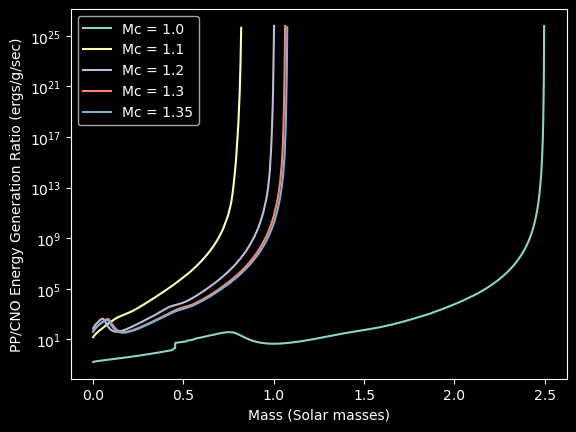

In [70]:
#..........................................................................PP/CNO.CYCLE......................................................................
# units of ergs/g/sec

# create the plot of density against radius using profile 4 data
# safely calculate the ratio pp/cno by replacing zeros in the denominator with NaN or a very small value
def safe_divide(pp, cno):
    cno_safe = np.where(cno == 0, np.nan, cno)  # replaces all zeros with NaN to avoid division by zero
    return pp / cno_safe

# plot the PP/CNO ratios for each dataset
plt.semilogy(a1.data('mass'), safe_divide(a1.data('pp'), a1.data('cno')), label='Mc = 1.0')
plt.semilogy(a2.data('mass'), safe_divide(a2.data('pp'), a2.data('cno')), label='Mc = 1.1')
plt.semilogy(a3.data('mass'), safe_divide(a3.data('pp'), a3.data('cno')), label='Mc = 1.2')
plt.semilogy(a4.data('mass'), safe_divide(a4.data('pp'), a4.data('cno')), label='Mc = 1.3')
plt.semilogy(a5.data('mass'), safe_divide(a5.data('pp'), a5.data('cno')), label='Mc = 1.35')

# assign accurate labels to the axes
plt.xlabel('Mass (Solar masses)')
plt.ylabel('PP/CNO Energy Generation Ratio (ergs/g/sec)')
plt.legend()
plt.show()

# ended up not being very useful in further explaining the peak of He3 in the data

In [87]:
# b = m.MesaData(file_name=path+'docs/profile_s1_001314.svg')
# a = m.MesaData(file_name=path+'LOGS1/profile11.data')
# print(b)

# pip install svglib reportlab

# not used but here I did some research and attempted to create an svg file in a specific directory for every graph produced but there was a much 
# simpler method
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas
import os

svg_file = "profile_s1_001314.svg"
print(f"Current directory: {os.getcwd()}")
print(f"File exists: {os.path.isfile(svg_file)}")

def print_svg(svg_file, output_pdf):
    drawing = svg2rlg(svg_file)
    if not drawing:
        raise ValueError(f"Failed to load SVG file: {svg_file}")
    c = canvas.Canvas(output_pdf)
    renderPDF.draw(drawing, c, 0, 0)
    c.save()

try:
    print_svg("profile_s1_001314.svg", "output.pdf")
except Exception as e:
    print(f"Error: {e}")

Current directory: /home/stdi6279/astr3400project
File exists: True


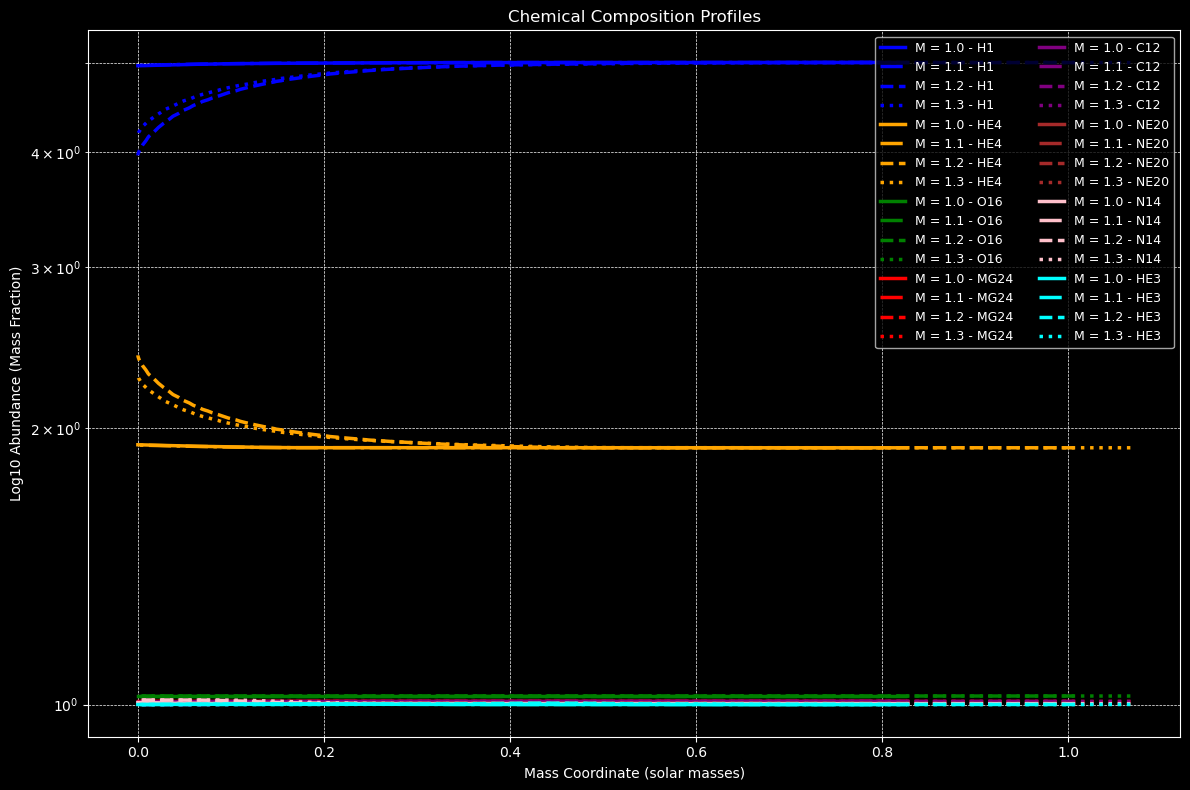

In [93]:
'''
NOTES FOR LATER

- Look at notes to explain all of the relations between the different chemicals and why there are reflections of some elements
- Make a test to show what we are doing follows simple physics
- Try and maybe find a new package to add detail to the results
'''
def plot_all_chemicals(a1, a2, a3, a4, label1, label2, label3, label4, output_image):
    # list of chemicals to plot
    chemicals = ['h1', 'he4', 'o16', 'mg24', 'c12', 'ne20', 'n14', 'he3']
    # colors so we can differentiate between the lines
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'cyan']
    
    plt.figure(figsize=(12, 8))
    
    # using enumerate which 
    for i, chem in enumerate(chemicals):
        plt.style.use('dark_background')
        # for the sake of our eyes
        plt.style.use('dark_background')
        # plot for dataset 1
        plt.semilogy(a1.data('mass'), 10**a1.data(chem), label=f'{label1} - {chem.upper()}', color=colors[i], linestyle='solid', linewidth=2.5)
        # plot for dataset 2
        plt.semilogy(a2.data('mass'), 10**a2.data(chem), label=f'{label2} - {chem.upper()}', color=colors[i], linestyle='dashdot', linewidth=2.5)
        # plot for dataset 3
        plt.semilogy(a3.data('mass'), 10**a3.data(chem), label=f'{label3} - {chem.upper()}', color=colors[i], linestyle='dashed', linewidth=2.5)
        # plot for dataset 4
        plt.semilogy(a4.data('mass'), 10**a4.data(chem), label=f'{label4} - {chem.upper()}', color=colors[i], linestyle='dotted', linewidth=2.5)
    
    # add labels, legend, and title
    plt.xlabel("Mass Coordinate (solar masses)")
    plt.ylabel("Log10 Abundance (Mass Fraction)")
    plt.title("Chemical Composition Profiles")
    plt.legend(ncol=2, fontsize=9, loc='upper right')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # plt.ylim(0.98, 1.03)
    
    # save and display the plot
    plt.tight_layout()
    plt.savefig(output_image)
    plt.show()

# easier way to output the needed plots
output_image = "chemical_compositions_all_new.png"
plot_all_chemicals(a1, a2, a3, a4, label1="M = 1.0", label2="M = 1.1", label3="M = 1.2", label4="M = 1.3", output_image=output_image)

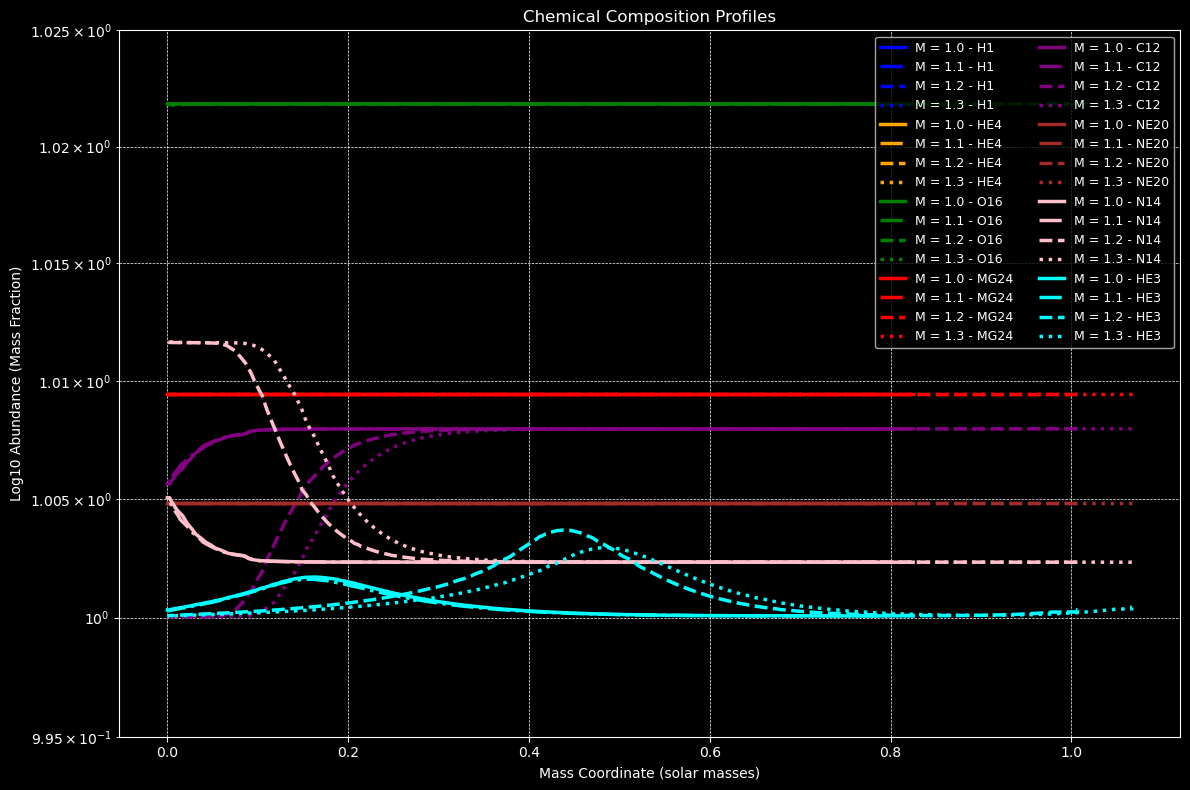

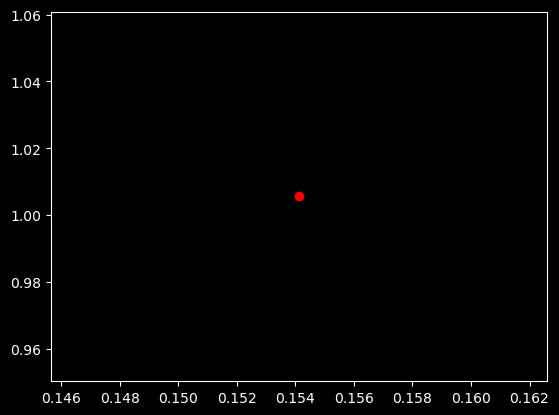

[0.000739365377303622, 0.0006980423354479842, 0.0015965076284446787, 0.001277980197063043]
1.0079683214432402


In [95]:
   def plot_all_chemicals(a1, a2, a3, a4, label1, label2, label3, label4, output_image):
    # list of chemicals to plot
    chemicals = ['h1', 'he4', 'o16', 'mg24', 'c12', 'ne20', 'n14', 'he3']
    # colors so we can differentiate between the lines
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'cyan']
    
    plt.figure(figsize=(12, 8))
    
    for i, chem in enumerate(chemicals):
        # for the sake of our eyes
        plt.style.use('dark_background')
        # plot for dataset 1
        plt.semilogy(a1.data('mass'), 10**a1.data(chem), label=f'{label1} - {chem.upper()}', color=colors[i], linestyle='solid', linewidth=2.5)
        # plot for dataset 2
        plt.semilogy(a2.data('mass'), 10**a2.data(chem), label=f'{label2} - {chem.upper()}', color=colors[i], linestyle='dashdot', linewidth=2.5)
        # plot for dataset 3
        plt.semilogy(a3.data('mass'), 10**a3.data(chem), label=f'{label3} - {chem.upper()}', color=colors[i], linestyle='dashed', linewidth=2.5)
        # plot for dataset 4
        plt.semilogy(a4.data('mass'), 10**a4.data(chem), label=f'{label4} - {chem.upper()}', color=colors[i], linestyle='dotted', linewidth=2.5)
        
    # add labels, legend, and title
    plt.xlabel("Mass Coordinate (solar masses)")
    plt.ylabel("Log10 Abundance (Mass Fraction)")
    plt.title("Chemical Composition Profiles")
    plt.legend(ncol=2, fontsize=9, loc='upper right')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    plt.ylim(0.995, 1.025)
    #plt.xlim(0.1, 0.25)
    
    # Save and display the plot
    plt.tight_layout()
    plt.savefig(output_image)
    plt.show()

output_image = "chemical_compositions_all_new.png"
plot_all_chemicals(a1, a2, a3, a4, label1="M = 1.0", label2="M = 1.1", label3="M = 1.2", label4="M = 1.3", output_image=output_image)

# used to find where the two curves overlap for C12 and N14
idx = np.argwhere(np.diff(np.sign(a3.data('c12') - a3.data('n14')))).flatten()
plt.plot(a3.data('mass')[idx], 10**a3.data('c12')[idx], 'ro')
plt.show()

# attempting to find the peak of the He3 curve but this information didn't seem to provide any further explanation
max_he3 = [max(a1.data('he3')), max(a2.data('he3')), max(a3.data('he3')), max(a4.data('he3'))]

print(max_he3)
print(10**a3.data('c12')[3])


In [96]:
# here I am testing the use of animations just encase we find it useful for representing data

import time

symbols = ["-", "\\", "|", "/"]

for i in range(20):
    print(symbols[i % 4], end="\r")
    time.sleep(0.1)

In [94]:
'''
..............................................................................NEXT..................................................................................

Plot the energy generation rate (eps_nuc from LOGS/profile.data) to correlate fusion efficiency with the mass coordinate.
Further work could be to impliment time evolution of the code as the code is set to run for 1.031 years

ANALYSIS
The chemical composition profiles of the accreting star show key features of stellar energy generation and structural evolution under the influence of mass accretion. 
The direct reflection observed between the hydrogen (H1) and helium-4 (He4) mass fractions underscores the efficiency of nuclear fusion processes, where hydrogen is 
systematically converted into helium-4. This symmetry further becomes prominent with increased accreted mass, and it points to the role that accretion plays in enhancing 
gravitational pressure and temperature and therefore causes hydrogen depletion. 

The interplay in the abundances of C12, N14, and O16 reflects the dynamics of the CNO cycle, with the accumulation of nitrogen owing to its
bottleneck function in this reaction chain for N14 to O16. Smooth profiles of the CNO process for the lower-mass accretion cases 1M and 1.1M indicate stable core and shell burning. 
In contrast, the appearance of a higher peak for higher accreted masses (1.2M, 1.3M ) indicates the presence of secondary burning zones, probably related to stronger 
shell burning and convective mixing. Oxygen (O16) shows a flat profile since it is produced and destroyed in similar rates due to the speed of the reactions.

NOW NEED
Further plots are needed to properly explain the details of the mechanisms generating these phenomena. Temperature and density profiles will help in 
explaining the He3 peak migration and identifying the conditions favorable for secondary burning. Energy generation rates (eps_pp, eps_CNO, eps_nuc) could be plotted to 
determine the dominant energy generation processes at different mass coordinates. Further, analyzing the convective boundaries and their interaction with chemical composition
gradients may provide insights into the role of mixing in such profile determination. 

AFTER TESTING
may not be convective zones
there is a definite relationship between the cno cycle graphs the n14 and c12 changes.

We think that the reason that there are different amounts of he3 and there is a change in the relationship between n14 and c12 may be caused by the fact that there is a 
switch between the dominancy of the pp chain and the cno chain. Using a graph, which is on the github, it can clearly be shown that the temperature dependence of the of 
pp chain is different to the cno chain so depending on the temperature of the star in certain areas pp may overtake the cno process. May need to plot these graphs and the pp chain 
and cno ratios in order to try and explain these anomalies.
'''

'\n..............................................................................NEXT..................................................................................\n\nPlot the energy generation rate (eps_nuc from LOGS/profile.data) to correlate fusion efficiency with the mass coordinate.\nFurther work could be to impliment time evolution of the code as the code is set to run for 1.031 years\n\nANALYSIS\nThe chemical composition profiles of the accreting star show key features of stellar energy generation and structural evolution under the influence of mass accretion. \nThe direct reflection observed between the hydrogen (H1) and helium-4 (He4) mass fractions underscores the efficiency of nuclear fusion processes, where hydrogen is \nsystematically converted into helium-4. This symmetry further becomes prominent with increased accreted mass, and it points to the role that accretion plays in enhancing \ngravitational pressure and temperature and therefore causes hydrogen depletion. \